In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [3]:
trainset = torchvision.datasets.MNIST(root='./home', train=True, transform=transforms.ToTensor(), download=True)
testset = torchvision.datasets.MNIST(root='./home', train=False, download=True, transform=transforms.ToTensor())

Extracting ./home/MNIST/raw/train-images-idx3-ubyte.gz to ./home/MNIST/raw


Extracting ./home/MNIST/raw/train-labels-idx1-ubyte.gz to ./home/MNIST/raw


Extracting ./home/MNIST/raw/t10k-images-idx3-ubyte.gz to ./home/MNIST/raw


Extracting ./home/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./home/MNIST/raw
Processing...
Done!





In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
for i in range(32):
  print(labels[i].item())

torch.Size([32, 1, 28, 28])
0
1
4
9
6
5
0
3
6
6
3
5
9
2
4
1
6
2
0
0
2
4
8
0
6
1
9
0
2
5
6
6


In [0]:
def imageshow(img):
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1, 2, 0))
  plt.imshow(npimg)
  plt.show()

In [8]:
img = images[0]
img = img.numpy()
img = np.transpose(img, (1, 2, 0))
img.shape

(28, 28, 1)

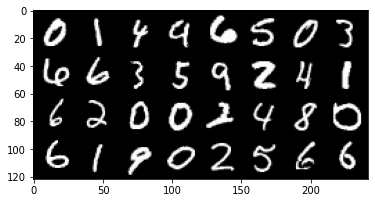

In [9]:
imageshow(torchvision.utils.make_grid(images))

In [10]:
device = torch.device('cuda:0')
print(device)

cuda:0


In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(1, 6, 5),    # (N, 1, 28, 28) -> (N, 6, 24, 24)
        nn.Tanh(),
        nn.MaxPool2d(2, 2),      # (N, 6, 24, 24) -> (N, 6, 12, 12)
        nn.Conv2d(6, 16, 5),     # (N, 6, 12, 12) -> (N, 16, 8, 8)
        nn.Tanh(),
        nn.MaxPool2d(2, 2)      # (N, 16, 8, 8) -> (N, 16, 4, 4)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(256, 120),    # (N, 256) -> (N, 120)
        nn.Tanh(),              
        nn.Linear(120, 84),     # (N, 120) -> (N, 84)
        nn.Tanh(),
        nn.Linear(84, 10)       # (N, 84) -> (N, 10)
    )
  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.shape[0], -1)
    x = self.fc_model(x)
    return x

In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    output = net(inputs)
    _, pred = torch.max(output, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * (correct / total)

In [13]:
for data in trainloader:
  inputs, labels = data
  inputs, labels = inputs.to(device), labels.to(device)
print(inputs.shape, labels.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), weight_decay=0.01)

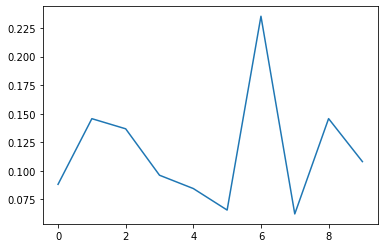

In [36]:
epochs = 10
loss_arr = []
for epoch in range(epochs):
  for i, data in enumerate(trainloader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    output = net(inputs)
    loss = loss_fn(output, labels)
    loss.backward()
    opt.step()
  loss_arr.append(loss.item())

plt.plot(loss_arr)
plt.show()

In [16]:
print('Train accuracy and test accuracy', evaluation(trainloader), evaluation(testloader))

Train accuracy and test accuracy 99.77833333333334 98.91


In [17]:
output.shape

torch.Size([32, 10])

In [0]:
net = net.to('cpu')

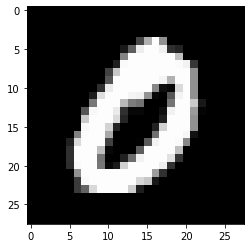

In [22]:
imageshow(torchvision.utils.make_grid(images[0,]))

In [33]:
out = net.cnn_model[0](images)
out.shape

torch.Size([32, 6, 24, 24])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


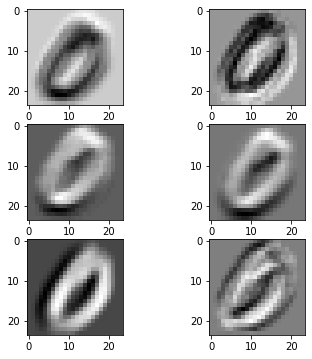

In [34]:
plt.figure(figsize=(6, 6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3, 2, i+1)
  plt.imshow(out[0, i, :, :].detach().numpy(), cmap='binary')
plt.show()

In [20]:
out = net(images)
out.shape

torch.Size([32, 10])

In [21]:
print(torch.max(out, 1))

torch.return_types.max(
values=tensor([17.0127, 14.1300, 13.9705, 12.6117, 16.3635, 16.0492, 16.4988, 15.3133,
        17.2516, 17.8592, 15.2333, 17.9665, 14.9676, 14.5315, 14.3717, 14.1637,
        14.5336, 16.6559, 15.8133, 15.7154, 13.4858, 14.8040, 15.4706, 13.3840,
        16.4395, 14.8612, 13.3437, 15.9498, 16.4074, 18.0823, 14.3034, 15.7056],
       grad_fn=<MaxBackward0>),
indices=tensor([0, 1, 4, 9, 6, 5, 0, 3, 6, 6, 3, 5, 9, 2, 4, 1, 6, 2, 0, 0, 2, 4, 8, 0,
        6, 1, 9, 0, 2, 5, 6, 6]))
